In [27]:
#Load Dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\dbala_aj6xwwm\Downloads\archive (1)\data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head

<bound method NDFrame.head of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liv

In [28]:
#data cleaning
df.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [30]:
df.shape

(2017, 16)

In [31]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [32]:
len(df.columns)

16

In [33]:
df.describe

<bound method NDFrame.describe of       acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

     

In [34]:
#data analysis
top_five_artists = df.groupby("artist").count().sort_values (by="song_title", ascending=False) ["song_title"][:5]
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

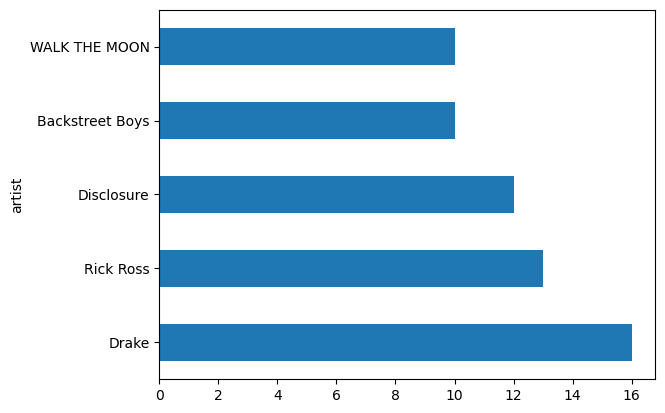

In [35]:
top_five_artists.plot.barh()
plt.show()

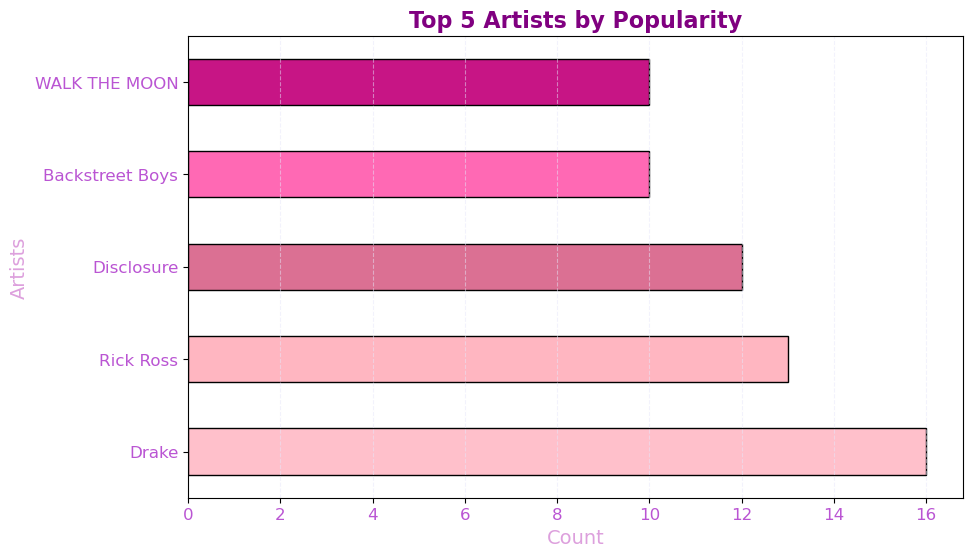

In [36]:
import matplotlib.pyplot as plt

# Assuming `top_five_artists` is a pandas Series or DataFrame with artists and their counts
top_five_artists.plot.barh(
    color=['#FFC0CB', '#FFB6C1', '#DB7093', '#FF69B4', '#C71585'],  # Girly pastel shades
    edgecolor='black',  # Outline for the bars
    figsize=(10, 6)  # Adjust the figure size
)

# Add a title and labels
plt.title("Top 5 Artists by Popularity", fontsize=16, fontweight='bold', color='#800080')  # Purple title
plt.xlabel("Count", fontsize=14, color='#DDA0DD')  # Light purple
plt.ylabel("Artists", fontsize=14, color='#DDA0DD')  # Light purple

# Customize tick labels
plt.xticks(fontsize=12, color='#BA55D3')  # Medium orchid color for x-axis ticks
plt.yticks(fontsize=12, color='#BA55D3')  # Medium orchid color for y-axis ticks

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5, color='#E6E6FA')  # Lavender gridlines

# Display the graph
plt.show()


In [37]:
# Top 5 loudest tracks
top_five_loudest_tracks = df[["loudness", "song_title"]].sort_values(by="loudness", ascending=False).head(5)
print(top_five_loudest_tracks)


      loudness                   song_title
195     -0.307                 GodLovesUgly
636     -0.718      The Lion - Original Mix
1443    -0.787                     The Wall
2010    -0.935  Hey Baby - Steve Aoki Remix
1299    -0.994                No Absolution


C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\456841155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks, palette="pastel")


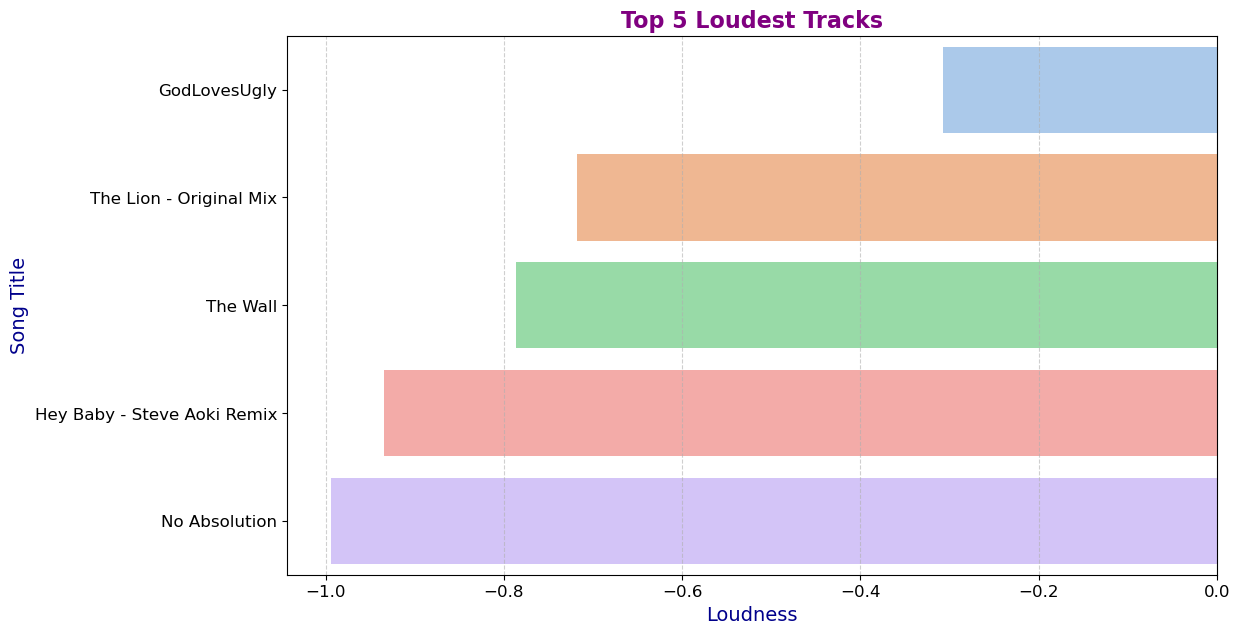

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks, palette="pastel")
plt.title("Top 5 Loudest Tracks", fontsize=16, fontweight='bold', color='purple')
plt.xlabel("Loudness", fontsize=14, color='darkblue')
plt.ylabel("Song Title", fontsize=14, color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


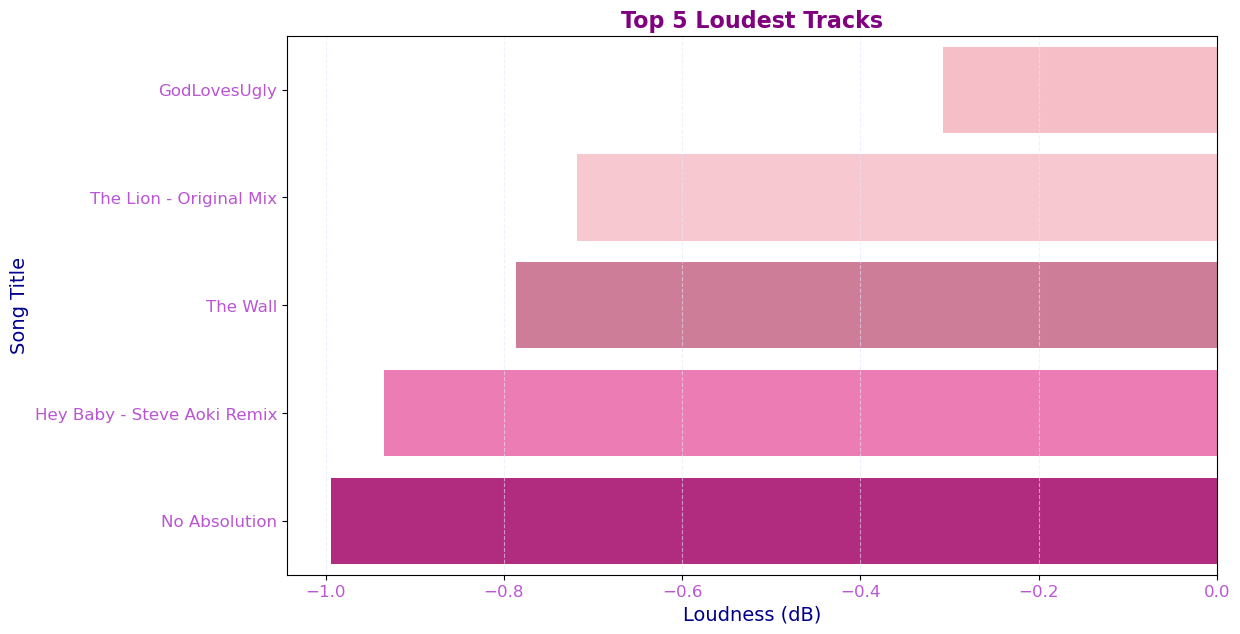

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x="loudness",
    y="song_title",
    data=top_five_loudest_tracks,
    hue="song_title",  # Assign `y` to `hue` for colors
    dodge=False,       # Ensures no separation in the bars
    palette=["#FFB6C1", "#FFC0CB", "#DB7093", "#FF69B4", "#C71585"]  # Girly pastel shades
)

# Add title and labels
plt.title("Top 5 Loudest Tracks", fontsize=16, fontweight='bold', color='#800080')  # Purple title
plt.xlabel("Loudness (dB)", fontsize=14, color='darkblue')
plt.ylabel("Song Title", fontsize=14, color='darkblue')

# Customize ticks
plt.xticks(fontsize=12, color='#BA55D3')  # Medium orchid color for x-axis ticks
plt.yticks(fontsize=12, color='#BA55D3')  # Medium orchid color for y-axis ticks

# Add gridlines for better readability
plt.grid(axis="x", linestyle="--", alpha=0.6, color='#E6E6FA')  # Lavender gridlines

# Remove the legend (optional, as each bar already represents a title)
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


In [40]:
top_five_artists_danceable_songs = df[["danceability", "song_title", "artist"]].sort_values(by=["danceability", "song_title", "artist"], ascending=[False, True, True])
print(top_five_artists_danceable_songs)

      danceability                                         song_title  \
1433         0.984                             Flashwind - Radio Edit   
1901         0.967                                           SexyBack   
604          0.962                                  Check Me Out Like   
32           0.959                                        Best Friend   
1957         0.959                                       Ice Ice Baby   
...            ...                                                ...   
1598         0.156  Piano Quartet in E flat, Op.47: 3. Andante can...   
1600         0.152         Trio Sonata in G Major, Wq. 144: I. Adagio   
817          0.148  Mozart: Requiem in D Minor, K. 626: VIII. Lacr...   
532          0.123                                    Wake Bake Skate   
729          0.122                                         Bumpy Road   

                         artist  
1433               Ben Remember  
1901          Justin Timberlake  
604                  

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\118831429.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="danceability", y="artist", data=top_artists, palette="viridis")


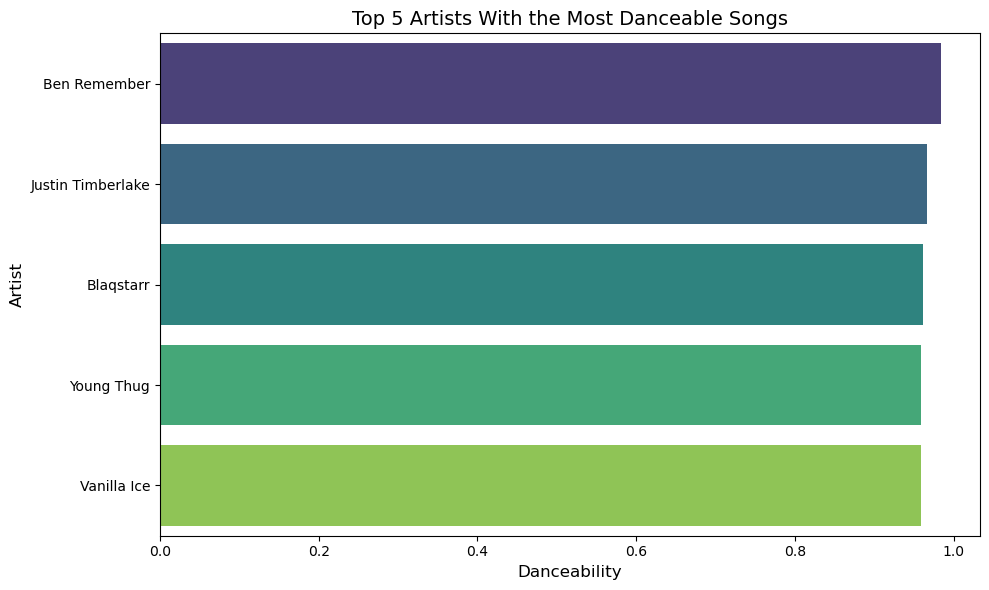

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by danceability and select the top 10 artists
top_artists = top_five_artists_danceable_songs.sort_values(by="danceability", ascending=False).head(5)

# Adjust the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
sns.barplot(x="danceability", y="artist", data=top_artists, palette="viridis")

# Set the title and labels
plt.title("Top 5 Artists With the Most Danceable Songs", fontsize=14)
plt.xlabel("Danceability", fontsize=12)
plt.ylabel("Artist", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [70]:
# Select the relevant columns and sort by 'instrumentalness' in descending order
top_five_instrumental_tracks = df[["instrumentalness", "song_title", "artist"]].sort_values(
    by="instrumentalness", ascending=False
).head(5)

# Display the top five instrumental tracks
top_five_instrumental_tracks


,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


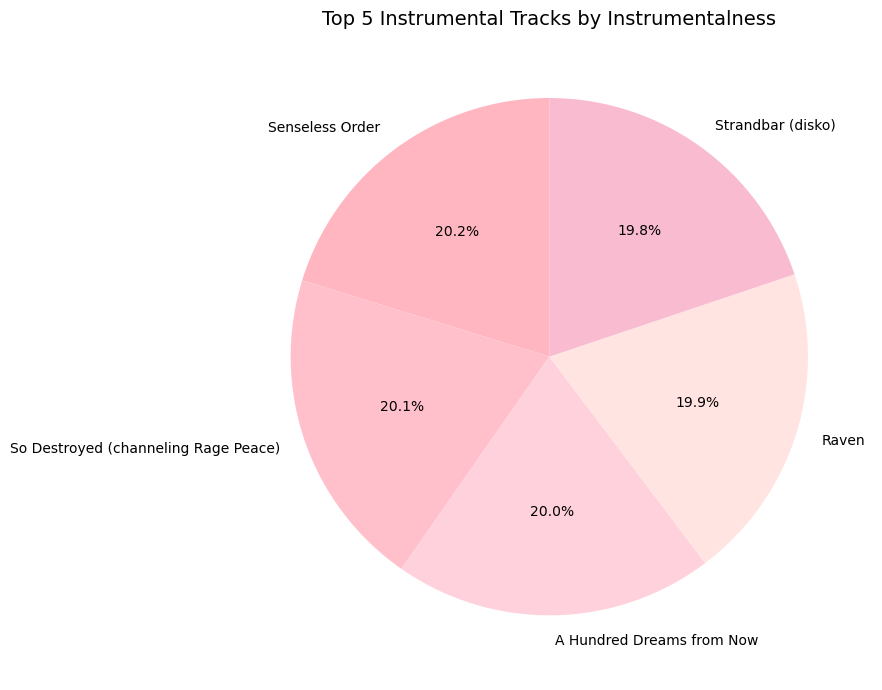

In [84]:
import matplotlib.pyplot as plt

# Extract the necessary values
instrumentalness_values = top_five_instrumental_tracks["instrumentalness"]
song_titles = top_five_instrumental_tracks["song_title"]

# Define pastel pink shades
pastel_pink_colors = [
    "#FFB6C1",  # Light Pink
    "#FFC0CB",  # Pink
    "#FFD1DC",  # Pastel Pink
    "#FFE4E1",  # Misty Rose
    "#F8BBD0"   # Pinkish tone
]

# Create the pie chart
plt.figure(figsize=(12, 7))
plt.pie(
    x=instrumentalness_values,  # Values for the pie slices
    labels=song_titles,  # Labels for the slices
    autopct="%1.1f%%",  # Display percentages
    startangle=90,  # Start the pie chart at the top
    colors=pastel_pink_colors  # Use custom pastel pink shades
)

# Add a title
plt.title("Top 5 Instrumental Tracks by Instrumentalness", fontsize=14)

# Show the chart
plt.tight_layout()
plt.show()


In [86]:
interest_feature_cols = ["tempo", "loudness", "acousticness", "danceability", "duration_ms",
"energy", "instrumentalness", "liveness", "speechiness", "valence"]

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

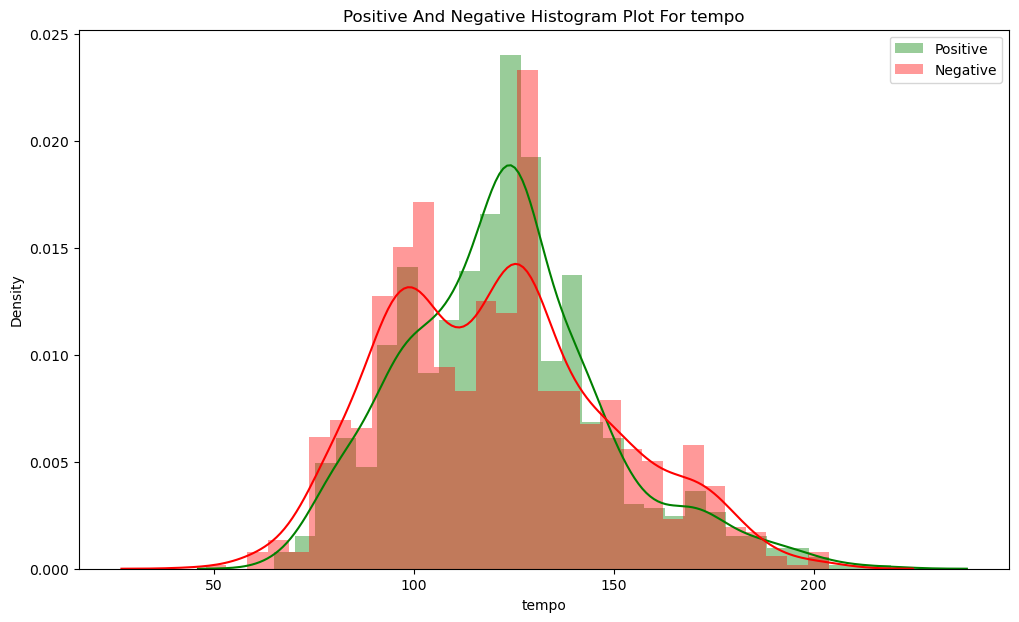

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

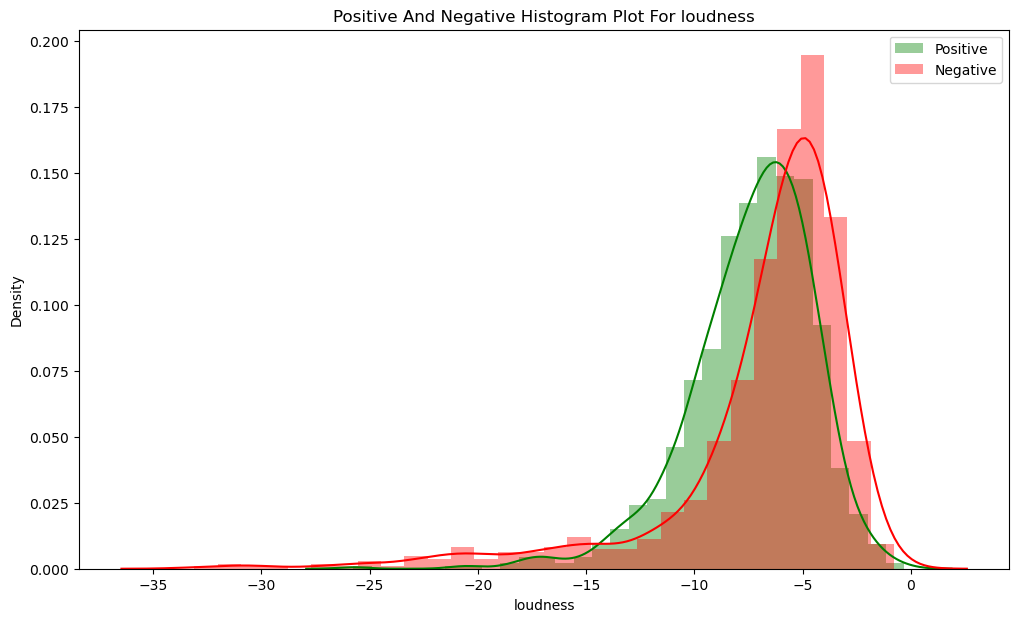

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

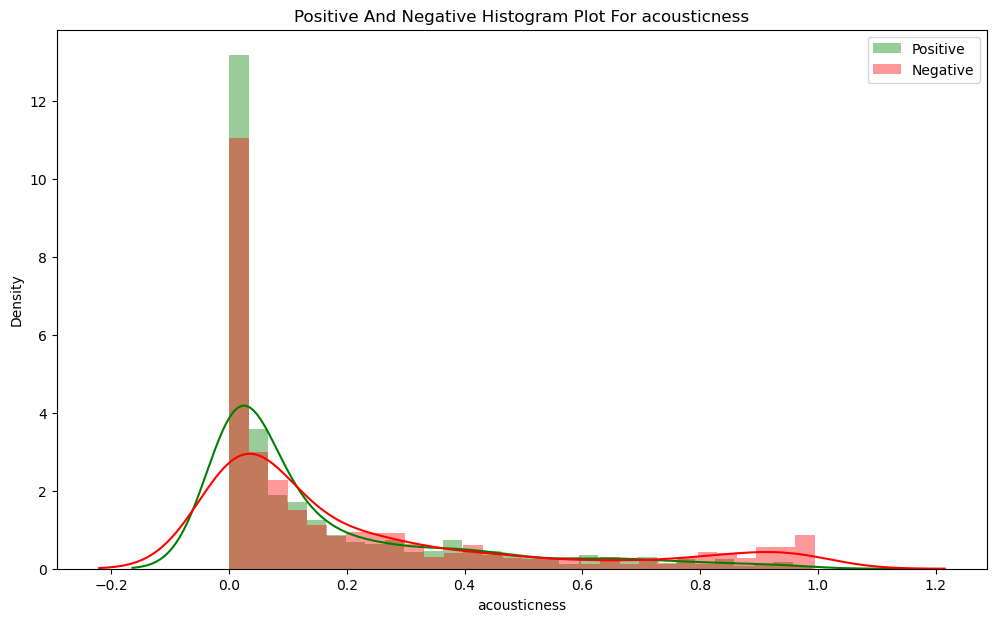

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

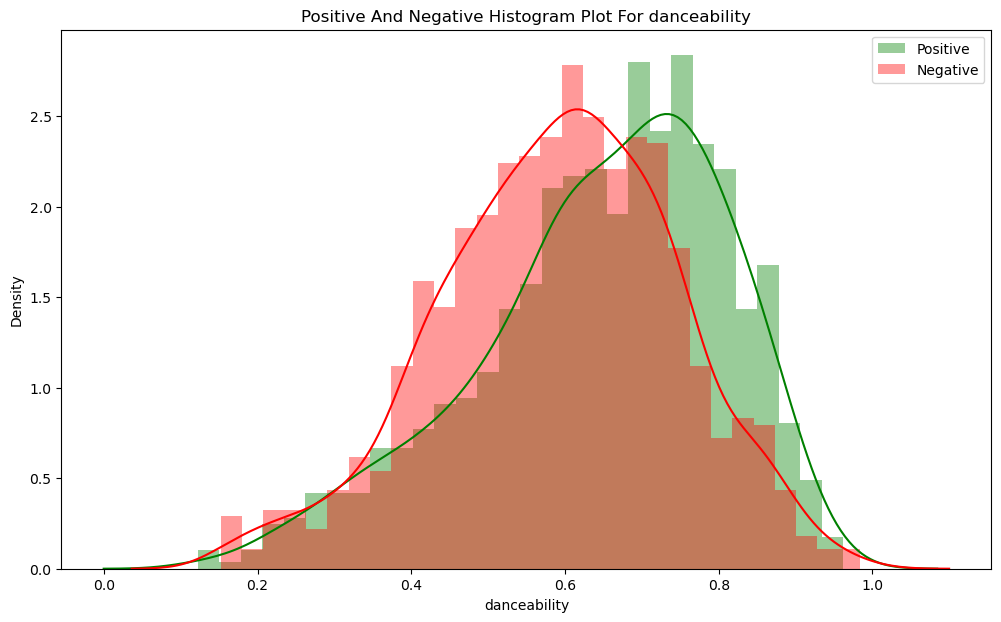

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

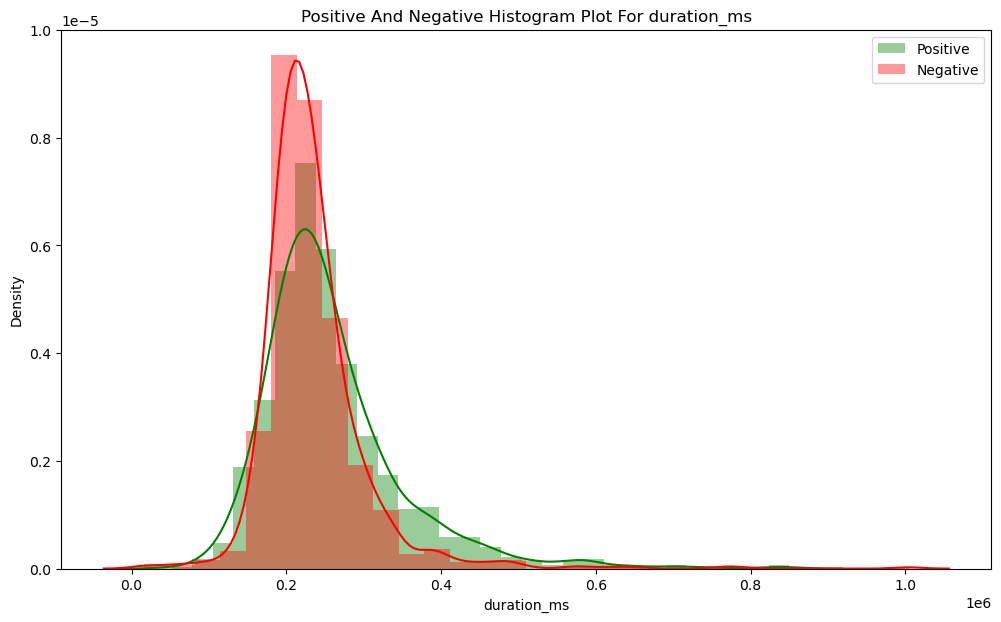

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

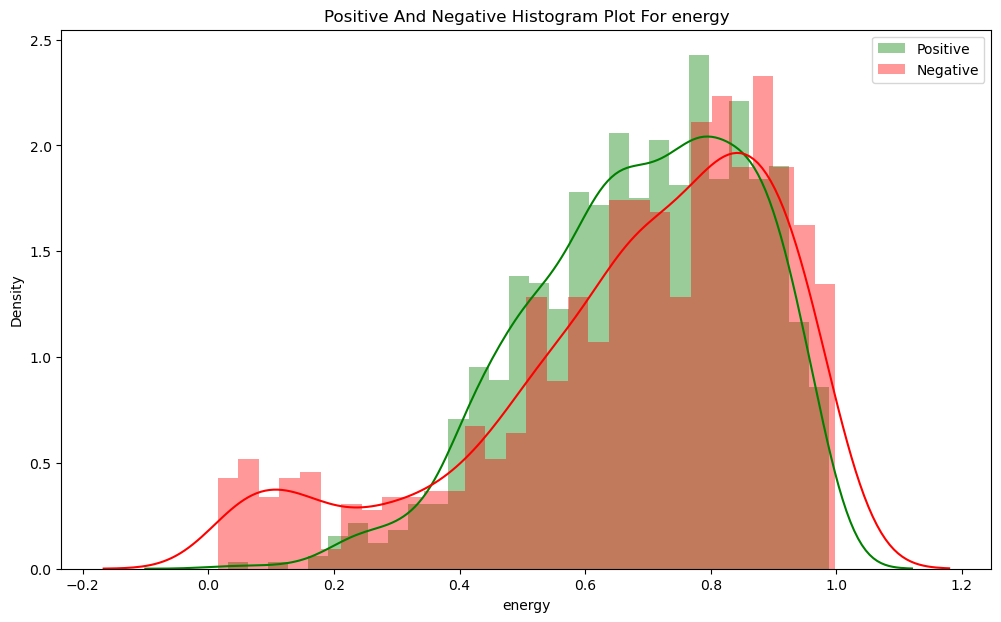

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

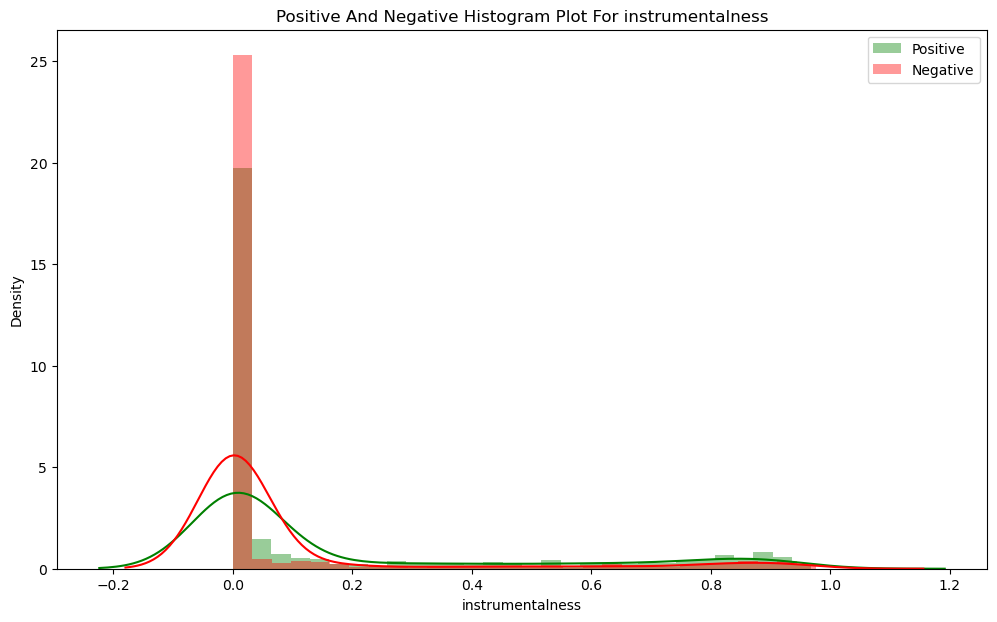

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

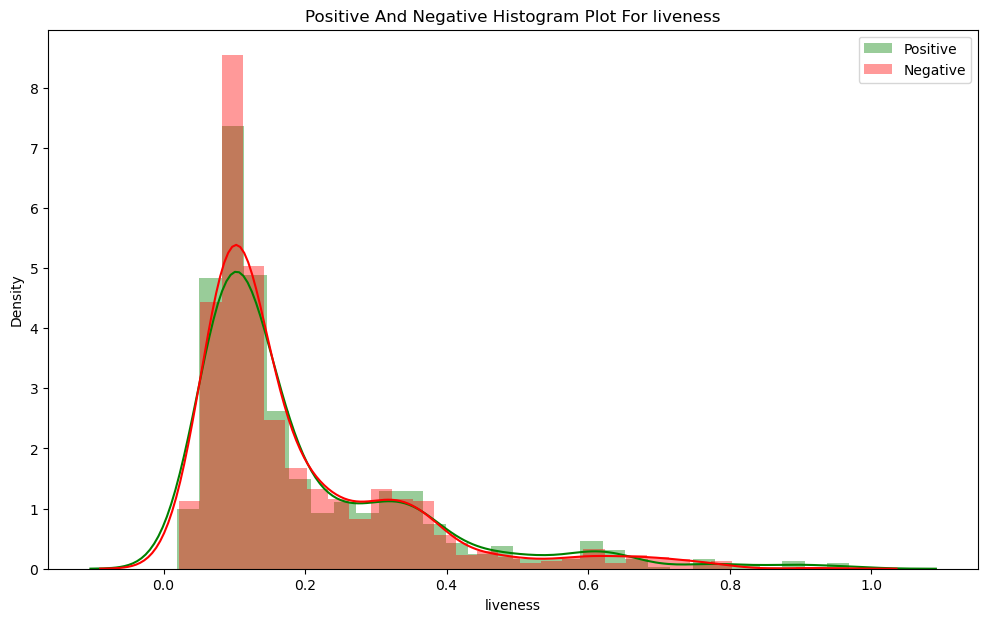

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

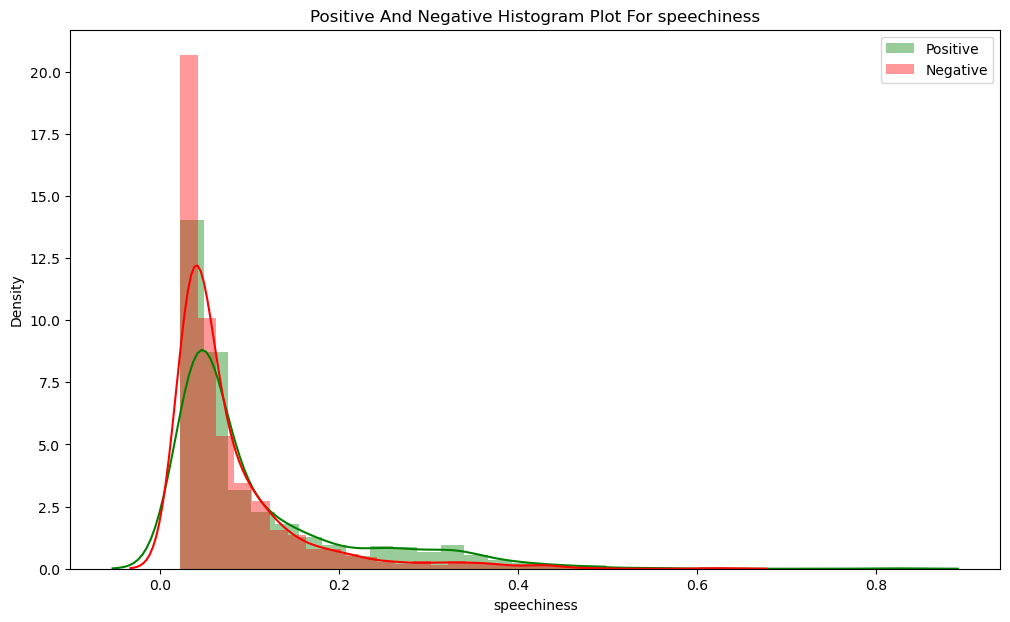

C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label="Positive", color="green")
C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\805844265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_

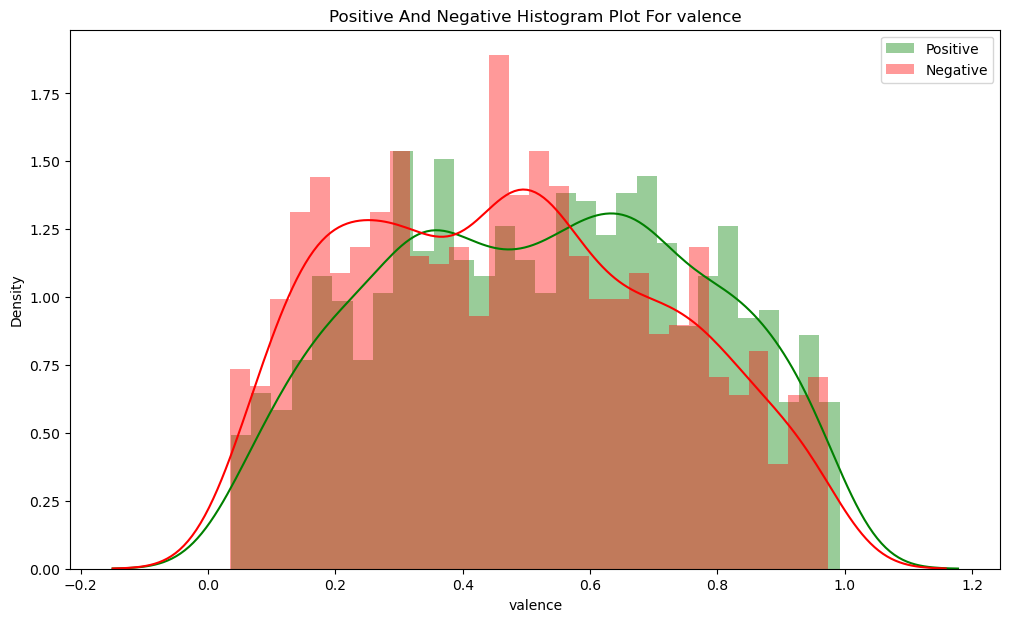

In [92]:
for feature_col in interest_feature_cols:
    pos_data=df[df ["target"] == 1] [feature_col]
    neg_data=df[df ["target"] == 0] [feature_col]
    plt.figure(figsize=(12, 7))
    sns.distplot(pos_data, bins=30, label="Positive", color="green")
    sns.distplot(neg_data, bins=30, label="Negative", color="red")
    plt. legend (loc= "upper right")
    plt.title(f"Positive And Negative Histogram Plot For {feature_col}")
    plt.show()

In [96]:
top_energetic_tracks = df[["energy", "song_title", "artist"]].sort_values(by="energy", ascending=False).head(10)
print("Top 10 Energetic Tracks:")
print(top_energetic_tracks)


Top 10 Energetic Tracks:
      energy           song_title                    artist
1299   0.998        No Absolution         Thy Art Is Murder
1322   0.997           Pitchblack  Walking Dead On Broadway
1297   0.994    A Darkened Gospel      A Wake in Providence
1347   0.993           Unanswered           Suicide Silence
2015   0.992        First Contact                Twin Moons
1680   0.992             Paranoia         A Day To Remember
1332   0.992      Beautiful Agony          Within The Ruins
1328   0.991  Down into the Abyss               Conjonctive
1681   0.990                Hated                 Beartooth
1296   0.990         Black Colors       Victim Of Deception


C:\Users\dbala_aj6xwwm\AppData\Local\Temp\ipykernel_21732\2872089581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="energy", y="song_title", data=top_energetic_tracks, palette="coolwarm")


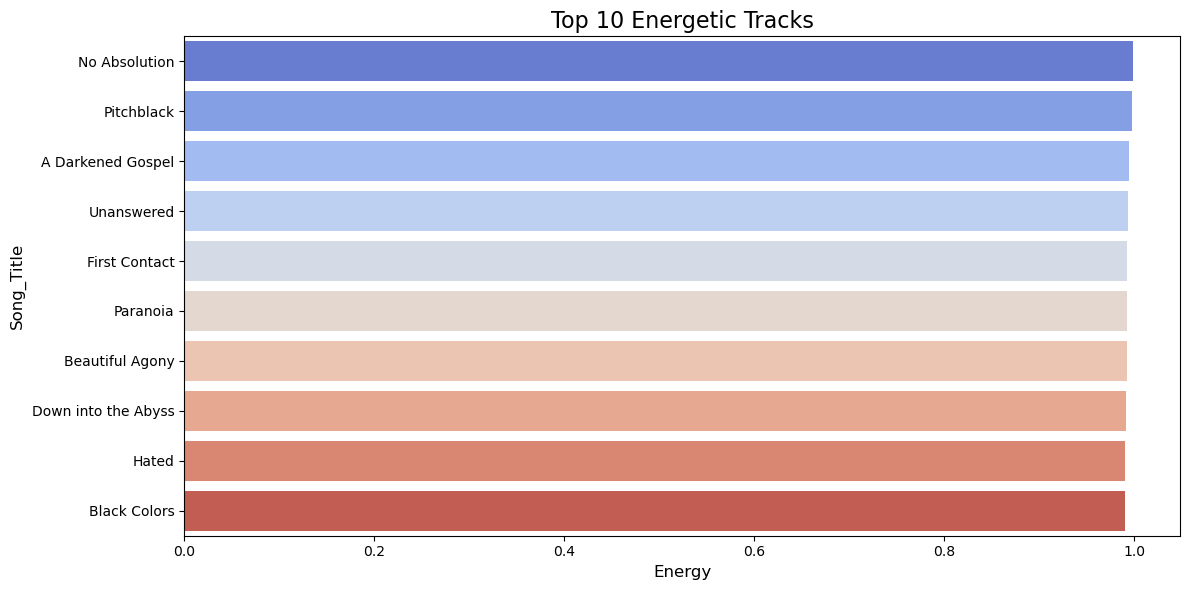

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Energetic Tracks
top_energetic_tracks = df[["energy", "song_title", "artist"]].sort_values(by="energy", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="energy", y="song_title", data=top_energetic_tracks, palette="coolwarm")
plt.title("Top 10 Energetic Tracks", fontsize=16)
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Song_Title", fontsize=12)
plt.tight_layout()
plt.show()


In [104]:
# Assuming there is a 'duration_ms' column
most_common_durations = df["duration_ms"].value_counts().head(5)
print("Most Common Durations:")
print(most_common_durations)


Most Common Durations:
duration_ms
192000    5
243493    3
206013    3
228467    3
240000    3
Name: count, dtype: int64


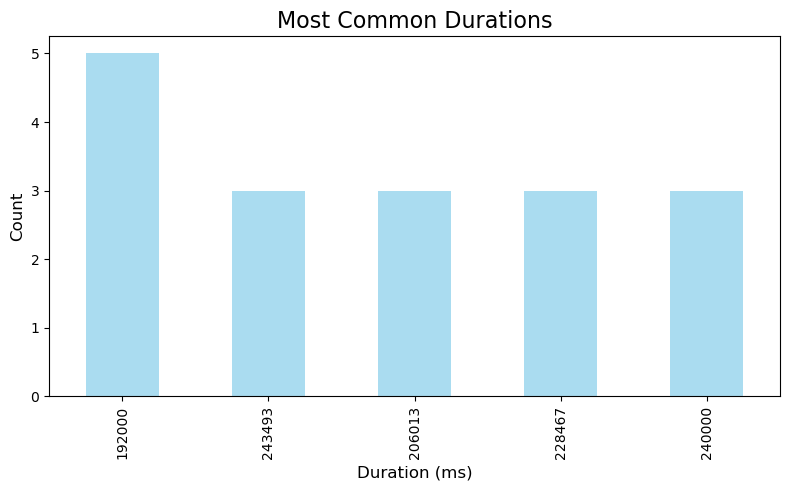

In [106]:
# Most Common Durations
most_common_durations = df["duration_ms"].value_counts().head(5)

# Bar plot
plt.figure(figsize=(8, 5))
most_common_durations.plot(kind="bar", color="skyblue", alpha=0.7)
plt.title("Most Common Durations", fontsize=16)
plt.xlabel("Duration (ms)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


In [108]:
most_popular_artist = df["artist"].value_counts().idxmax()
print(f"Most Popular Artist: {most_popular_artist}")


Most Popular Artist: Drake


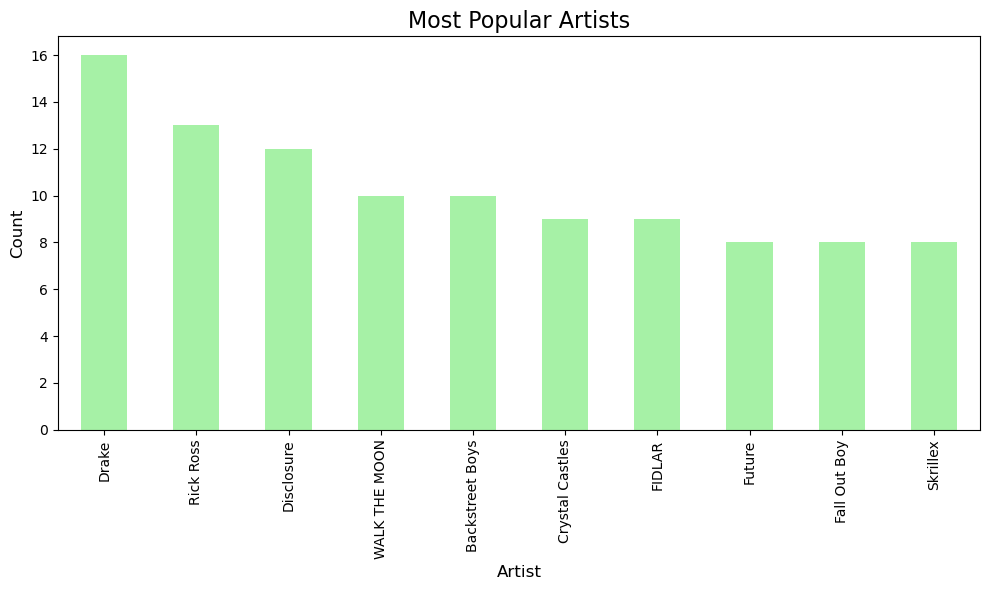

In [110]:
# Most Popular Artists (Top 10)
most_popular_artists = df["artist"].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
most_popular_artists.plot(kind="bar", color="lightgreen", alpha=0.8)
plt.title("Most Popular Artists", fontsize=16)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


In [114]:
top_valence_tracks = df[["valence", "song_title", "artist"]].sort_values(by="valence", ascending=False).head(10)
print("Top 10 Tracks With the Most Valence:")
print(top_valence_tracks)


Top 10 Tracks With the Most Valence:
      valence                                         song_title  \
460     0.992                             Abataka - Original Mix   
912     0.975                I'm Walkin' - 2002 Digital Remaster   
1966    0.974        To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)   
207     0.973                                        Look at You   
48      0.973                              Azon de ma gnin kpevi   
337     0.972  Let's Lovedance Tonight - Danny Krivit Re-edit...   
1590    0.972                                   Jelly On A Plate   
838     0.971  Let's Lovedance Tonight - Danny Krivit Re-edit...   
497     0.968                               Mi Swing es Tropical   
112     0.967                                 Please Mr. Postman   

                           artist  
460                   Ida Engberg  
912                   Fats Domino  
1966                       Polina  
207                 George McCrae  
48    T. P. Orchestre Poly-Rythmo 

In [118]:
# Top 10 Tracks With Most Valence
top_valence_tracks = df[["valence", "song_title", "artist"]].sort_values(by="valence", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="valence", y="song title", data=top_valence_tracks, palette="magma")
plt.title("Top 10 Tracks With the Most Valence", fontsize=16)
plt.xlabel("Valence", fontsize=12)
plt.ylabel("Song_Title", fontsize=12)
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `song title` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>